# UTS

### Nama  : Niken Amalia
### NIM   : 200411100109
### Kelas : Penambangan Data A

## Menganalisa data dengan menggunakan klasifikasi


## Metode KNN

In [ ]:
#import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Niken-Amalia/datamining/main/dataR2.csv")
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
# Mengukur dataset
df.shape

(116, 10)

In [ ]:
# Membagi data X dan Y# X tanpa label
X = df.drop(columns=["Classification"])
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
#label y
y = df["Classification"].values
y[0:116]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [ ]:
#Membagi data ke data test dan data tranning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:5]

array([[-1.99870762e-01,  1.77497398e+00,  1.11147412e+00,
         2.42579535e-01,  2.63712046e-01,  3.32084933e+00,
        -3.53601251e-01, -7.98401203e-01, -8.96813736e-01],
       [-2.61575829e-01,  1.92667044e+00,  2.16240100e-01,
         6.71901217e-02,  2.71926419e-03,  5.62315407e-02,
         1.30573410e+00, -3.89670515e-01,  4.67707681e-01],
       [ 9.10820452e-01, -3.68794536e-01, -7.28729138e-01,
        -6.76319466e-01, -5.30791475e-01, -6.07166943e-02,
         3.19975082e+00, -9.39015325e-01, -3.99043511e-01],
       [-3.84985964e-01, -1.69222255e+00, -1.81641684e-01,
        -5.20238052e-01, -4.13823515e-01, -7.90474522e-01,
        -6.57635110e-01, -7.58294756e-01, -1.26169663e+00],
       [-1.18715184e+00, -8.29930211e-01, -1.07687570e+00,
        -3.76893851e-01, -3.95202370e-01, -5.70764749e-01,
         1.01859454e+00, -4.61398643e-01, -1.04901974e+00]])

### Membangun KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
KNeighborsClassifier()

KNeighborsClassifier()

In [ ]:
knn.predict(X_test)[0:5]

array([2, 2, 1, 2, 1])

In [ ]:
#memeriksa keakuratan model pada tes data
knn.score(X_test, y_test)

0.9166666666666666

### Hasil Akurasi

In [ ]:
from sklearn.metrics import *
import numpy as np

#Check Accuracy precision, recall, f1-score
print( classification_report(y_test, knn.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(y_test, knn.predict(X_test)))
print(F'Precision:', precision_score(y_test, knn.predict(X_test)))
print(F'Recall:', recall_score(y_test, knn.predict(X_test)))
print(F'F1 Score:', f1_score(y_test, knn.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(y_test, knn.predict(X_test)) )

print( F'Balanced Accuracy Score:',balanced_accuracy_score(y_test, knn.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(y_test, knn.predict(X_test)) )
print()#Print a new line

              precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       0.92      0.92      0.92        13

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24

Accuracy: 0.9166666666666666
Precision: 0.9090909090909091
Recall: 0.9090909090909091
F1 Score: 0.9090909090909091
Roc Auc Score: 0.9160839160839161
Balanced Accuracy Score: 0.916083916083916
Confusion Matrix: [[10  1]
 [ 1 12]]



## Decission Tree

In [ ]:
# Import Modul
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
# Memasukkan Dataset
df=pd.read_csv("https://raw.githubusercontent.com/arsymaulanaali/datamining/main/dataR2.csv")
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [ ]:
y = df["Classification"]
X = df.drop(columns=["Classification"])

### Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Model Decission Tree

In [ ]:
# membangun decision tree menggunakan gini
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_train,y_train)

#Prediksi data test
y_pred = clf.predict(X_test)

In [ ]:
#Akurasi
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7428571428571429


### Visualisasi Decission Tree

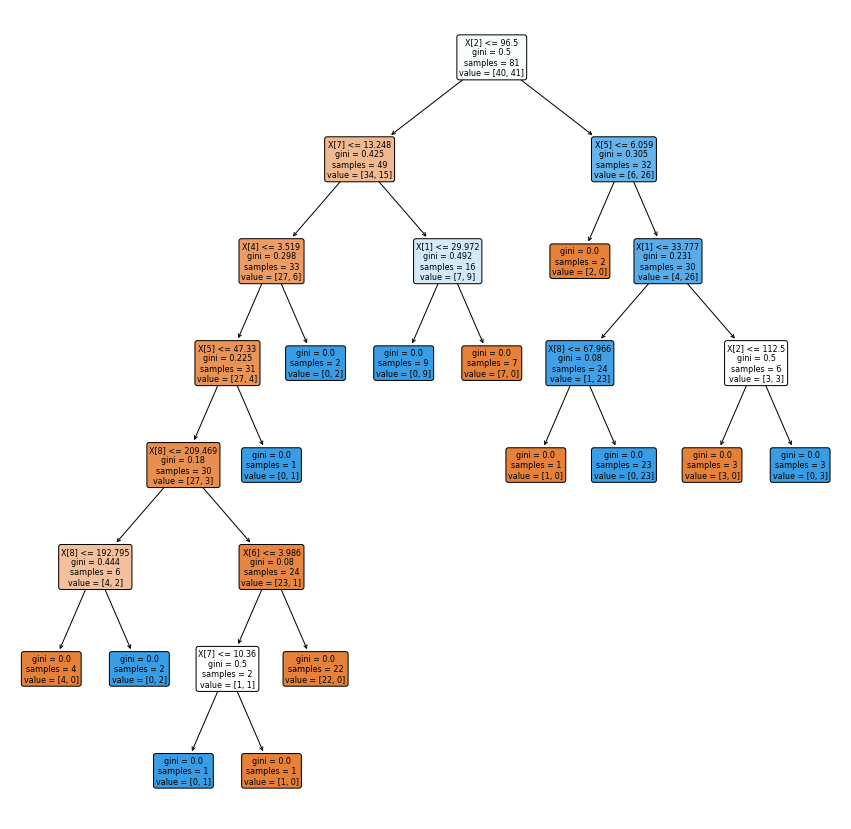

In [ ]:
plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()